In [4]:
using Gadfly
using Convex
using ECOS
using Interact

In [5]:
function minimize_cost(X,y,λ,func)
    w = Variable(size(X,2),size(y,2))
    problem = minimize(0.5*sumsquares(X*w-y)+λ*func(w))
    solve!(problem, ECOSSolver(verbose=false))
    w.value
end

minimize_cost (generic function with 1 method)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"λ",0.5,0.0:0.01:1.0)

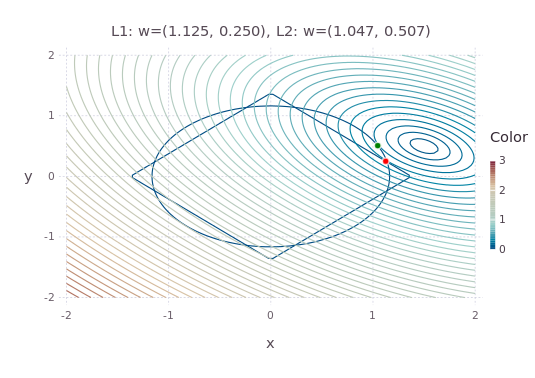

In [6]:
X = [1.0 0.5;0.0 1;]
y = [1.75, 0.5]

# Loss function
L(w) = 0.5*norm(X*w-y,2)

# L1-norm penalty
p1(w) = norm(w,1)

# L2-norm penalty
p2(w) = norm(w,2) 

@manipulate for λ=0.0:0.01:1.0
    w_L1 = minimize_cost(X,y,λ,p1)
    w_L2 = minimize_cost(X,y,λ,p2)
    
    plot(
    layer(x=[w_L1[1]],y=[w_L1[2]],Geom.point,Theme(default_color=colorant"red")),
    layer(x=[w_L2[1]],y=[w_L2[2]],Geom.point,Theme(default_color=colorant"green")),
    layer(z=(x,y)->L([x,y]), x=linspace(-2,2,100), y=linspace(-2,2,100), Geom.contour(levels=50)),
    layer(z=(x,y)->p1([x,y]), x=linspace(-2,2,100), y=linspace(-2,2,100), Geom.contour(levels=p1(w_L1))),
    layer(z=(x,y)->p2([x,y]), x=linspace(-2,2,100), y=linspace(-2,2,100), Geom.contour(levels=p2(w_L2))),
    Guide.title(@sprintf("L1: w=(%1.3f, %1.3f), L2: w=(%1.3f, %1.3f)",w_L1[1],w_L1[2],w_L2[1],w_L2[2]))
    )
end